Nicolaos Bibissidis, Andréas Decaestecker

# Travail personnel 2: diffusion magnétique.

Pour ce travail, nous allons considéré l'évolution d'un champ magnétique à l'intérieur d'un conducteur contenat une cavitée supraconductrice. Pour étudier l'évolution de ce champ magnétique $\vec{B}$, on voudrait aboutir à une équation de diffusion de la forme:

\begin{equation}
\frac{\partial \vec{B}}{\partial t} = \frac{1}{\alpha}(\frac{\partial^2 \vec{B}}{\partial x^2}+\frac{\partial^2 \vec{B}}{\partial y^2}) \tag{1}
\end{equation}

A partir des équations de Maxwell:
\begin{equation}
\nabla \times \vec{E} = - \frac{\partial \vec{B}}{\partial t}      \tag{2}                   
\end{equation}
\begin{equation}
\nabla \times \vec{B} = \mu \vec{J}                          \tag{3}
\end{equation}
\begin{equation}
\nabla . \vec{B} = 0                        \tag{4}
\end{equation}

Et de la loi d'Ohm:
\begin{equation}
\vec{J} = \sigma \vec{E}                        \tag{5}
\end{equation}

On subsituant $\vec{B}$ dans l'équation $(2)$ par l'équation $(5)$, on obtient:
\begin{equation}
\nabla \times \vec{ \frac{\vec{J}}{\sigma} } = - \frac{\partial \vec{B}}{\partial t}      \tag{6}                   
\end{equation}

Et en subsituant $\vec{J}$ dans l'équation $(6)$ par l'équation $(3)$, on trouve:

\begin{equation}
\nabla \times (\frac{\nabla \times \vec{B}}{\mu \sigma}) = - \frac{\partial \vec{B}}{\partial t}      \tag{7}               \end{equation}

On utilise la relation $ \nabla \times \nabla \times \vec{B} = \nabla (\nabla . \vec{B}) - \nabla^2 \vec{B} $ et l'équation $(4)$ pour obtenir:
\begin{equation}
\frac{1}{\mu \sigma}\nabla^2 \vec{B} =  \frac{\partial \vec{B}}{\partial t}      \tag{8}    
\end{equation}
Ce qui nous donne une équation de la forme $(1)$:
\begin{equation}
\frac{1}{\mu \sigma}( \frac{\partial^2 \vec{B}}{\partial x^2} + \frac{\partial^2 \vec{B}}{\partial y^2})  =  \frac{\partial \vec{B}}{\partial t}      \tag{8}    
\end{equation}

Pour des raisons de symétrie autour de l'axe oz, le champ magnétique est de la forme: $ \vec{B} = (0,0,B(x,y))$.



La composante tangantielle du champ magnétique étant discontinue du fait de la présence du courant de surface $J = 1$, on observe que 

\begin{equation}
\vec{B_{int,//}} - \vec{B_{ext,//}} = \mu \vec{J} \times \vec{n}    
\end{equation}

Où $ \vec{B}_{int,//} $ est la composante tangantielle du champ magnétique à l'intérieur du conducteur, $ \vec{B}_{ext,//} = 0 $ est la composante tangantielle du champ magnétique à l'extérieur du conducteur, $\vec{n}$ la normal à la surface du conducteur. On a alors comme condition aux bords extérieur $B= -\mu$ sur le bord de la surface.
Le rotationnel de $\vec{B}$ étant nul au bord du supraconcteur $ \nabla \times \vec{B} =0 $, on obtient comme condition aux bords que les dérivés du champs magnétique aux bords doivent être nulle, $ \frac{\partial \vec{B}}{\partial x} = 0 $, $ \frac{\partial \vec{B}}{\partial y} = 0 $. De plus, dans le supraconducteur $\sigma$ tend vers l'infini ce qui annule le terme de gauche de l'équation $(8)$. On a donc que le champ magnétique est constant au cours du temps dans le supraconducteur et vu que initiallement le champ magnétique est nulle, le champ magnétique $ B_{supracond} = 0 $. 

On prend un temps dt pour la discrétisation égal à $dt = 2.5.10^{-7}s$ pour respecter la condition de stabilitée:

\begin{equation}
\alpha \frac{\Delta t}{(\Delta x)^2}+\alpha \frac{\Delta t}{(\Delta y)^2} < \frac{1}{2} 
\end{equation}
Avec $ \alpha = \frac{1}{\sigma \mu} $ où $ \mu = 1.26.10^{-6} N/A^2 $ et $ \sigma_{cond} = 5.96.10^{7} S/m$.

(0.0, 0.014999999999999999, 0.0, 0.014999999999999999)

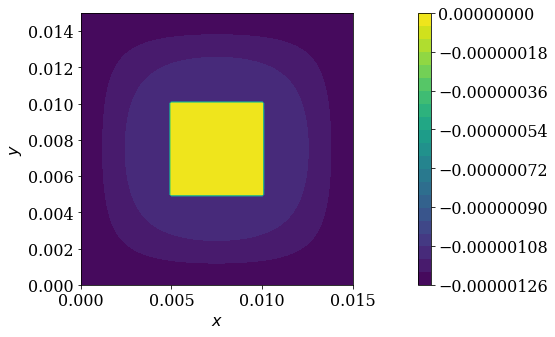

In [20]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


def ftcs(T, nt, alpha, dt, dx, dy):
   
    for n in range(nt):
        Tn = T.copy()
        
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + alpha * (dt/dy**2 * (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] + Tn[:-2,1:-1]) +\
             dt/dx**2 * (Tn[1:-1,2:] - 2*Tn[1:-1,1:-1] + Tn[1:-1,:-2]))
        
        
        #condition de Neumann pour le bord exterieur
        T[1,:] =T[0,:]
        T[:,1] =T[:,0]
        T[-2,:] =T[-1,:]
        T[:,-2] =T[:,-1]
        # condition de Neumann pour le supraconducteur
        T[39,40:81] =T[38,40:81]
        T[40:81,39] =T[40:81,38]
        T[81,40:81] =T[82,40:81]
        T[40:81,81] =T[40:81,82]
        # condition de Dirichlet le supraconducteur
        T[40:81,40]= 0
        T[40,40:81]= 0
        T[80,40:81]= 0
        T[40:81,80]= 0
        
    return T

L = 1.5e-2
H = 1.5e-2

nx = 121
ny = 121
nt = 5000  #ceci correspond à 1.25*10^-3s

dx = L/(nx-1)
dy = H/(ny-1)

x = numpy.linspace(0,L,nx)
y = numpy.linspace(0,H,ny)

alpha = 1/(5.96*1.26*10)

Ti = numpy.zeros((ny, nx))

#conditions diri ext

Ti[0,:]   =-1.26e-6
Ti[:,0]   =-1.26e-6
Ti[120,:] =-1.26e-6
Ti[:,120] =-1.26e-6

dt = 2.5e-7

B = ftcs(Ti.copy(), nt, alpha, dt, dx, dy)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,B,20,cmap=cm.viridis)

pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();
pyplot.axis('scaled')



Nous pouvons trouver la valeur du champs magnétique en (x,y,z)=(0.0025,0.0025,0) au point  d'indice x=20, y=20

In [21]:
print (B[20][20])


-1.19387983877e-06


La densité de courant en un point du conducteur est donnée par la formule:
\begin{equation}
\vec{J} = \frac{1}{\mu}(\frac{\partial B}{\partial y} u_x - \frac{\partial B}{\partial x} u_y)
\end{equation}
Une fois discrétiser cela donne:
\begin{equation}
\vec{J} = \frac{1}{\mu}(\frac{B_{i,j+1} -B_{i,j}}{\Delta y} u_x - \frac{B_{i+1,j}-B_{i,j}}{\Delta x} u_y)
\end{equation}


In [22]:
print( 'J=',(B[20][20]-B[20][19])/(dx*1.26e-6) ,"ux +", (B[20][20]-B[19][20])/(dy*1.26e-6),'uy')

J= 18.6796443421 ux + 18.6796443421 uy


In [23]:
nt = 50000 #ceci correspond 1.25*10^-2
B = ftcs(Ti.copy(), nt, alpha, dt, dx, dy)

Pour calculer le flux du champ magnétique à travers la surface du conducteur, il faut conciderer l'intégrale suivante:
\begin{equation}
\Phi = \int_{\Sigma} \mathrm{\vec{B}}\,\mathrm{d}\ \vec{\Sigma} = \int_0^{0.015} \int_0^{0.015} B \,dx\,dy
\end{equation} 
Cependant, on peut aussi discrétiser cette intégrale de la manière suivante:
\begin{equation}
\Phi = \sum_{i=1}^{120} \sum_{j=1}^{120} B_{i,j}
\end{equation}

In [24]:
def flux(i,nx,j,ny,dx,dy):
    flu = 0
    while i < nx:
        while j < ny:
            flu = flu + B[i][j]*dx*dy
            i = i + 1
            j = j + 1
    return (flu)
print(flux(0,121,0,121,0.000125,0.000125))

-1.57499999995e-12
